# Accuracy by gain

Results:

- The biophysical model predicts a maximal achievable sorting accuracy with Kilosort of 0.11.
- no noise gain fitd crashes.

In [14]:
# SETUP PACKAGES 
%load_ext autoreload
%autoreload 2
import os
import numpy as np
from matplotlib import pyplot as plt

# SET PROJECT PATH
PROJ_PATH = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/preprint_2023"
os.chdir(PROJ_PATH)
from src.nodes.utils import get_config
import spikeinterface as si 
from spikeinterface import comparison

# DATASETS

# SILICO MARQUES
data_conf_marques, _ = get_config("silico_neuropixels", "concatenated").values()
NOISE_PATH = data_conf_marques["preprocessing"]["fitting"]["missing_noise_path"]
SORTING_TRUE = data_conf_marques["sorting"]["simulation"]["ground_truth"]["output"]
SFREQ = 40000

# KS3 SORTINGS
SORTING_NOISE_NONE_GAIN_500 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_500"] # Fails
SORTING_NOISE_NONE_GAIN_1e3 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_1e3"]
SORTING_NOISE_NONE_GAIN_5000 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_5000"]
SORTING_NOISE_NONE_GAIN_1e4 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_1e4"]
SORTING_NOISE_NONE_GAIN_1e5 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_1e5"]
SORTING_NOISE_NONE_GAIN_1e6 = data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]["output_buttw_noise_0uV_gain_1e6"]

# FIGURE SETTINGS
FIG_SIZE = (4, 4)
COLOR_VIVO = np.array([153,153,153]) / 255
COLOR_SILI = np.array([228, 26, 28]) / 255
COLOR_BUCCI = np.array([55,126,184]) / 255
BOX_ASPECT = 1                  # square fig
LG_FRAMEON = False              # no legend frame
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 30
plt.rcParams['lines.linewidth'] = 1.1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.major.width'] = 0.8 * 1.2
plt.rcParams['xtick.major.size'] = 3.5 * 1.2
plt.rcParams['xtick.minor.size'] = 2 * 1.2
plt.rcParams['ytick.major.size'] = 3.5 * 1.2
plt.rcParams['ytick.major.width'] = 0.8 * 1.2
plt.rcParams['ytick.minor.size'] = 2 * 1.2

N_MAJOR_TICKS = 4
N_MINOR_TICKS = 12
YLIM = [1e-7, 1e8]
savefig_cfg = {"transparent":True, "dpi":300}
legend_cfg = {"frameon": False, "handletextpad": 0.1}
tight_layout_cfg = {"pad": 0.5}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2024-06-03 11:48:19,612 - root - utils.py - get_config - INFO - Reading experiment config.
2024-06-03 11:48:19,681 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Utils

In [7]:
def get_accuracy_for_slice(
    GT_SORTING_PATH_marques, KS_SORTING_PATH_marques, start_frame, end_frame
):
    SortingTrue = si.load_extractor(GT_SORTING_PATH_marques)
    SortingTrue = SortingTrue.frame_slice(start_frame=start_frame, end_frame=end_frame)

    SortingKS = si.load_extractor(KS_SORTING_PATH_marques)
    comp = comparison.compare_sorter_to_ground_truth(
        SortingTrue, SortingKS, exhaustive_gt=True
    )
    return comp.agreement_scores.max(axis=1).sort_values(ascending=False).values

In [8]:
noise = np.load(NOISE_PATH + "L1.npy", allow_pickle=True).item()
noise["gain"]

338.5819091796875

In [10]:
# list available sortings
data_conf_marques["sorting"]["sorters"]["kilosort3"]["10m"]

{'output_buttw_gain_none_noise_none': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/SortingKS3_buttw_gain_none_noise_none_10m/',
 'ks3_output_buttw_gain_none_noise_none': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/KS3_output_buttw_gain_none_noise_none/',
 'output_buttw_noise_0uV': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/SortingKS3_buttw_noise_0uV_10m/',
 'ks3_output_buttw_noise_0uV': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/KS3_output_buttw_noise_0uV_10m/',
 'output_buttw_noise_20_perc_lower': '/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/0_silico/neuropixels/concatenated_campaigns/SortingKS3_buttw_noise_20_perc_lower_10m/',
 'ks3_output_buttw_noise_20_perc_lower': '/gpfs/bbp.cscs.ch/project/proj85/scratch

### Accuracies

In [21]:
# a_noise_none_gain_500 = np.mean(
#     get_accuracy_for_slice(
#         SORTING_TRUE,
#         SORTING_NOISE_NONE_GAIN_500,
#         start_frame=0,
#         end_frame=10 * 60 * SFREQ,
#     )
#     >= 0.8
# )
a_noise_none_gain_1e3 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_NOISE_NONE_GAIN_1e3,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)
a_noise_none_gain_5000 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_NOISE_NONE_GAIN_5000,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)
a_noise_none_gain_1e4 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_NOISE_NONE_GAIN_1e4,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)
a_noise_none_gain_1e5 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_NOISE_NONE_GAIN_1e5,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)
a_noise_none_gain_1e6 = np.mean(
    get_accuracy_for_slice(
        SORTING_TRUE,
        SORTING_NOISE_NONE_GAIN_1e6,
        start_frame=0,
        end_frame=10 * 60 * SFREQ,
    )
    >= 0.8
)

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterface/core/base.py:1079: UserWarning: Versions are not the same. This might lead to compatibility errors. Using spikeinterface==0.96.1 is recommended
  warnings.warn(
/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/envs/spikinterf0_100_5/lib/python3.9/site-packages/spikeinterfa

### Plot

[0.0994236311239193, 0.10590778097982709, 0.11023054755043228, 0.09293948126801153, 0.024495677233429394]


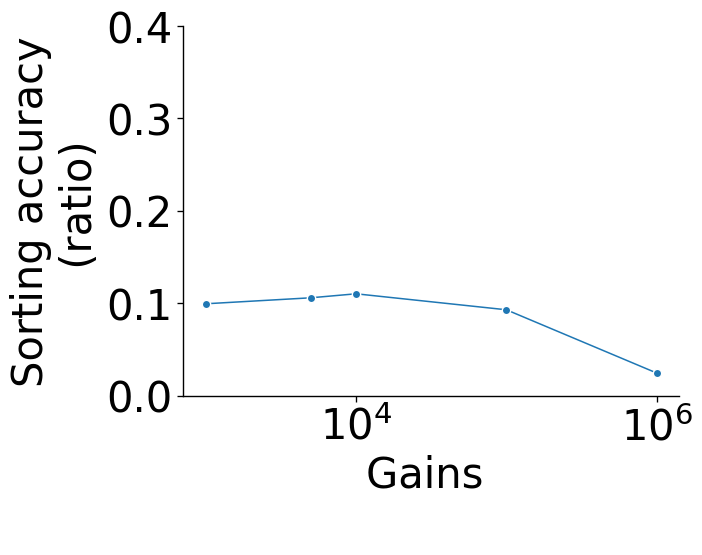

In [23]:
# set plot data
accs = [
    a_noise_none_gain_1e3,  # much higher gain
    a_noise_none_gain_5000,  # much higher gain
    a_noise_none_gain_1e4,  # much higher gain
    a_noise_none_gain_1e5,  # much higher gain
    a_noise_none_gain_1e6,  # much higher gain
]
gains = [1e3, 5000, 1e4, 1e5, 1e6]

# plot
fig, ax = plt.subplots()
ax.plot(gains, accs, "-o", markeredgecolor="w")
ax.set_ylabel("Sorting accuracy\n (ratio)")
ax.set_xlabel("Gain \n")
ax.set_ylim([0, 0.4])
# ax.set_xlim([-0.01, 0.1])
ax.set_xscale("log")

# save
# plt.savefig("figures/6_supp/supp_fig2/svg/npx_acc_vs_noise.svg", **savefig_cfg)

print(accs)